In [78]:
import matplotlib.pyplot as plt
import pandas as pd

In [79]:
model_output = pd.read_csv('model_output.csv')
model_output

,Datetime,PowerOut,ArrayPower,Service,DelvrEff,BatSoc,BatDrain,BatPwr,Warn,Month,DayofMonth,DayofYear,AC_Load,DC_Load,Total_Load
0,2021-01-01 00:00:00-06:00,3.877551,-0.0,1.0,0.0,82.165190,-4.265306,1045.943191,NaN,1,1,1,0.0,3.5,3.5
1,2021-01-01 01:00:00-06:00,3.877551,-0.0,1.0,0.0,81.830125,-4.265306,1040.877434,NaN,1,1,1,0.0,3.5,3.5
2,2021-01-01 02:00:00-06:00,3.877551,-0.0,1.0,0.0,81.494801,-4.265306,1035.811069,NaN,1,1,1,0.0,3.5,3.5
3,2021-01-01 03:00:00-06:00,3.877551,-0.0,1.0,0.0,81.159219,-4.265306,1030.744092,NaN,1,1,1,0.0,3.5,3.5
4,2021-01-01 04:00:00-06:00,3.877551,-0.0,1.0,0.0,80.823375,-4.265306,1025.676500,NaN,1,1,1,0.0,3.5,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2021-12-31 19:00:00-06:00,3.877551,-0.0,1.0,0.0,99.353552,-4.265306,1309.924411,NaN,12,31,365,0.0,3.5,3.5
8756,2021-12-31 20:00:00-06:00,3.877551,-0.0,1.0,0.0,99.030042,-4.265306,1304.885940,NaN,12,31,365,0.0,3.5,3.5
8757,2021-12-31 21:00:00-06:00,3.877551,-0.0,1.0,0.0,98.706341,-4.265306,1299.847017,NaN,12,31,365,0.0,3.5,3.5
8758,2021-12-31 22:00:00-06:00,3.877551,-0.0,1.0,0.0,98.382446,-4.265306,1294.807638,NaN,12,31,365,0.0,3.5,3.5


In [80]:
battery_soc = model_output[['Datetime', 'BatSoc']].copy()
battery_soc['Datetime'] = pd.to_datetime(battery_soc['Datetime'])
battery_soc = battery_soc.set_index(battery_soc['Datetime'])
battery_soc = battery_soc.drop(['Datetime'], axis=1)
battery_soc = battery_soc.resample('D').mean()
battery_soc

,BatSoc
Datetime,
2021-01-01 00:00:00-06:00,91.742755
2021-01-02 00:00:00-06:00,98.449968
2021-01-03 00:00:00-06:00,98.449434
2021-01-04 00:00:00-06:00,98.448971
2021-01-05 00:00:00-06:00,98.448577
...,...
2021-12-27 00:00:00-06:00,98.454931
2021-12-28 00:00:00-06:00,98.453972
2021-12-29 00:00:00-06:00,98.453076


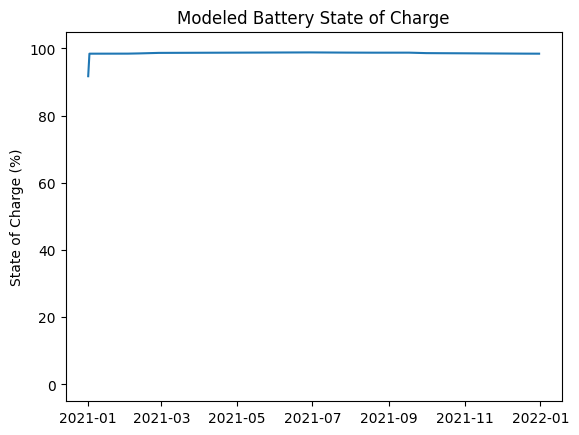

In [93]:
xs = battery_soc.index
ys = battery_soc['BatSoc']

fig = plt.figure()
ax = fig.subplots()
ax.set_title("Modeled Battery State of Charge")
ax.set_ylabel("State of Charge (%)")
ax.set_ylim(bottom=-5, top=105)
ax.plot(xs, ys)


In [82]:
service_uptime = model_output[['Datetime', 'Service']].copy()
service_uptime['Datetime'] = pd.to_datetime(service_uptime['Datetime'])
service_uptime = service_uptime.set_index(service_uptime['Datetime'])
service_uptime = service_uptime.drop(['Datetime'], axis=1)
service_uptime = service_uptime.resample('D').mean()
service_uptime

,Service
Datetime,
2021-01-01 00:00:00-06:00,1.0
2021-01-02 00:00:00-06:00,1.0
2021-01-03 00:00:00-06:00,1.0
2021-01-04 00:00:00-06:00,1.0
2021-01-05 00:00:00-06:00,1.0
...,...
2021-12-27 00:00:00-06:00,1.0
2021-12-28 00:00:00-06:00,1.0
2021-12-29 00:00:00-06:00,1.0


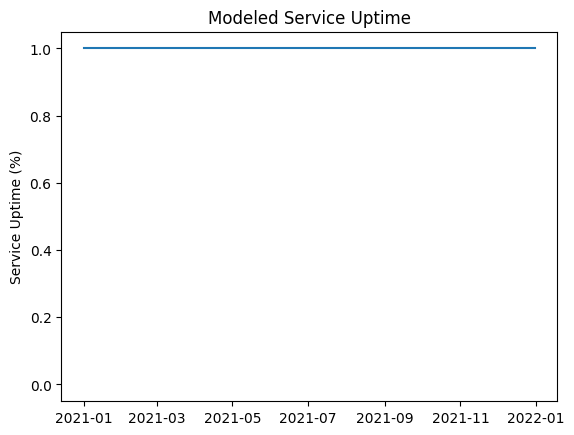

In [94]:
xs = service_uptime.index
ys = service_uptime['Service']

fig = plt.figure()
ax = fig.subplots()
ax.set_title("Modeled Service Uptime")
ax.set_ylabel("Service Uptime (%)")
ax.set_ylim(bottom=-0.05, top=1.05)
ax.plot(xs, ys)